# Wine quality dataset EDA 

FIAP - 10IA

Conceitos Estatísticos para IA

Análise exploratória de dados (EDA)

## Imports

In [792]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Load Dataset

Nessa primeira etapa, carregamos o dataset e excluímos a coluna de 'Id' de cada vinho.

Além disso, também substituírmos as strings White e Red por Branco e Tinto respectivamente.

In [593]:
data = pd.read_csv('../dataset/portugal_wine_quality.csv', sep=';', decimal=',')
data = data.drop(['id_vinho'], axis=1)
data = data.replace({'WHITE': "Branco", 'RED': "Tinto"})

Agora vamos preparar cópias do dataset que serão usadas em cada uma das seguintes etapas:

<br>

- EDA inicial de variáveis dependentes e variáveis independentes
- Análise com algorítmos de regressão
- Análise com algorítmos de classificação
- Análise com algorítimos não supervisionados (clusterização)

In [611]:
eda_data = data.copy()
reg_data = data.copy()
cls_data = data.copy()
uns_data = data.copy()

## EDA - investigação inicial e descritivo geral de variáveis dependentes e variáveis independentes

O dataset utilizado neste projeto é composto pelos seguintes atributos:

<br>

- id_vinho : id de identificação de um vinho.

- fixed acidity : a maioria dos ácidos presentes no vinho (fixos/não voláteis), de difícil evaporação.

- volatile acidity : quantidade de ácido acético presente em um vinho, altas quantidades trazem um gosto de vinagre.

- citric acid : um ácido que em pequenas quantidas traz um frescor ao sabor do vinho.

- residual sugar : quantidade de açúcar restante no vinho após o processo de fermentação.

- chlorides : quantidade de sal no vinho.

- free sulfur dioxide : SO2 livre existente no vinho, leva ao equilíbiro de boas bacterias melhorando o aroma e a cor do vinho.

- total sulfur dioxide : quantidade total de SO2 livre encontrado no vinho.

- density : densidade em comparação a água, dependendo do teor de álcool e açúcar.

- ph : define o nível de acidez do vinho.

- sulphates : contribui para os níveis de gás de dióxido de enxofre, com ação antimicrobiano e antioxidante.

- alcohol : teor alcoólico do vinho.

- quality : variável dependente identificando a qualidade do vinho, de 0 a 10.
<br>

#### Análise de balanceamento da variável dependente (variável target)

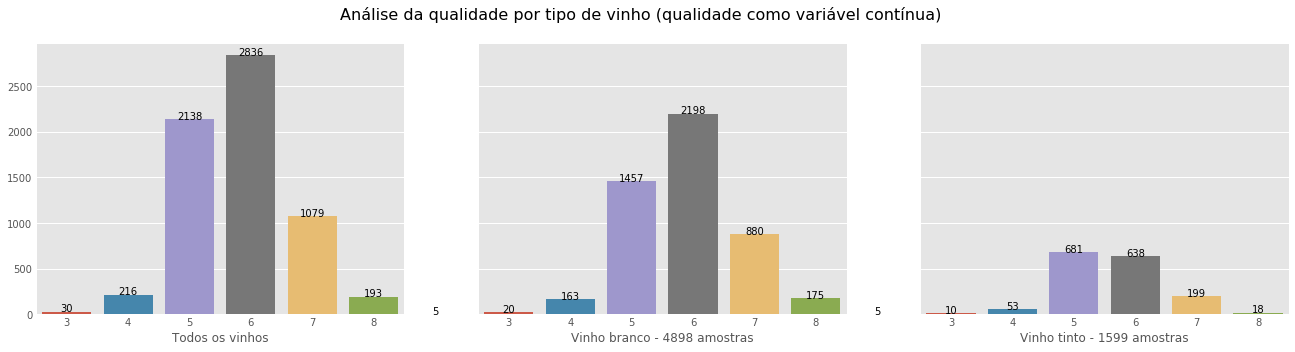

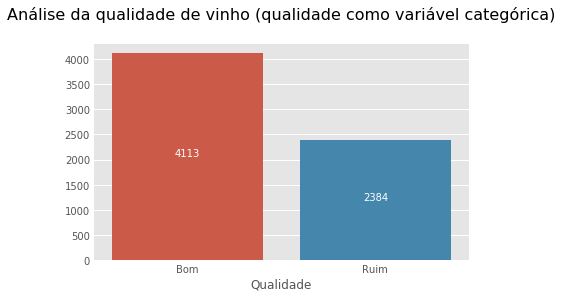

In [573]:
f, axes = plt.subplots(1, 3, figsize=(20,5), sharey=True, sharex=True)
f.suptitle("Análise da qualidade por tipo de vinho (qualidade como variável contínua)", fontsize = 16)
red_wine_counts = (eda_data[eda_data['Vinho'] == 'Tinto'])['quality'].value_counts()
white_wine_counts = (eda_data[eda_data['Vinho'] == 'Branco'])['quality'].value_counts()

ct = (eda_data['quality']).value_counts()
ct = ct.sort_index()
ax1 = sns.barplot(ct.index, ct.values, ax=axes[0])
for index, value in enumerate(ct):
    ax1.text(index, value, value, color='black', horizontalalignment='center')
ax1.set(xlabel="Todos os vinhos")

ct = white_wine_counts.sort_index()
ax2 = sns.barplot(list(white_wine_counts.index), list(white_wine_counts.values), ax=axes[1])
for index, value in enumerate(ct):
    ax2.text(index, value, value, color='black', horizontalalignment='center')
ax2.set(xlabel="Vinho branco - {} amostras".format(white_wine_counts.sum()))

ct = red_wine_counts.sort_index()
ax3 = sns.barplot(list(red_wine_counts.index), list(red_wine_counts.values), ax=axes[2])
for index, value in enumerate(ct):
    ax3.text(index, value, value, color='black', horizontalalignment='center')
ax3.set(xlabel="Vinho tinto - {} amostras".format(red_wine_counts.sum())) 

plt.show()

wine_categ = eda_data.copy()
wine_categ['quality'] = wine_categ.quality.apply(lambda i: "Bom" if i >= 6 else "Ruim")
ct = (wine_categ['quality']).value_counts()
ax4 = sns.barplot(ct.index, ct.values)
for index, value in enumerate(ct):
    ax4.text(index, value/2, value, color='white', horizontalalignment='center')
ax4.set_title("Análise da qualidade de vinho (qualidade como variável categórica)\n", fontsize=16)
ax4.set(xlabel="Qualidade")

plt.show()

Fica evidente um desbalanceamento dentor da variável target.

<br>

- Muito mais amostras de vinhos de qualidade mediana (5, 6 e 7) 
- Poucas amostras tanto de vinhos de baixa qualidade (1, 2, 3, 4) quanto de vinhos de alta qualidade (8 e 9)

<br>

Para um algorítmo de regressão, isso pode não se tornar um grande problema. Essa realidade muda assim que passamos a utilizar um algorítimo de classificação, por serem sensíveis ao desbalanceamento de classes. 

Vamos assumir o seguinte exemplo : suponha que possuímos 90 amostras de vinhos bons e 10 amostras de vinhos ruins. Um modelo de classificação treinado sob essas circunstâncias, poderia classificar todas as amostras como vinhos bons e ainda assim ter um alto score de acurácia, mesmo errando todas as amostras de vinhos ruins. 

Um modelo treinado em um conjunto de amostras desbalanceado tende a ter um alto bias a favor da classe mais comum.

<br>

#### Análise de balanceamento entre tipos de vinho

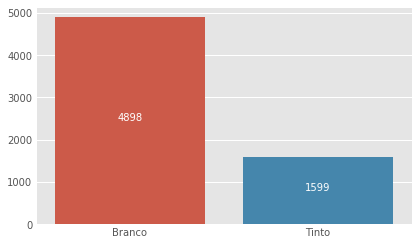

In [534]:
ct = (eda_data['Vinho']).value_counts()
ax = sns.barplot(ct.index, ct.values)
for index, value in enumerate(ct):
    ax.text(index, value/2, value, color='white', horizontalalignment='center')

Podemos observar através do gráfico acima que possuímos aproximadamente 3 vezes mais samples de vinhos brancos do que vinhos tintos.

#### Análise geral de variáveis independentes

In [571]:
q = eda_data.groupby('quality')
q.agg([np.mean, np.max, np.min]).round(3).T

quality                        3        4        5        6        7        8  \
fixedacidity       mean    7.853    7.289    7.327    7.177    7.129    6.835   
                   amax   11.800   12.500   15.900   14.300   15.600   12.600   
                   amin    4.200    4.600    4.500    3.800    4.200    3.900   
volatileacidity    mean    0.517    0.458    0.390    0.314    0.289    0.291   
                   amax    1.580    1.130    1.330    1.040    0.915    0.850   
                   amin    0.170    0.110    0.100    0.080    0.080    0.120   
citricacid         mean    0.281    0.272    0.308    0.324    0.335    0.333   
                   amax    0.660    1.000    1.000    1.660    0.760    0.740   
                   amin    0.000    0.000    0.000    0.000    0.000    0.030   
residualsugar      mean    5.140    4.154    5.804    5.543    4.732    5.383   
                   amax   16.200   17.550   23.500   45.800   19.250   14.800   
                   amin    0.700    0.700    0.600    0.700    0.900    0.800   
chlorides          mean    0.077    0.060    0.065    0.054    0.045    0.041   
                   amax    0.267    0.610    0.611    0.415    0.358    0.121   
                   amin    0.022    0.013    0.009    0.015    0.012    0.014   
freesulfurdioxide  mean   39.217   20.637   30.237   31.165   30.422   34.534   
                   amax  289.000  138.500  131.000  112.000  108.000  105.000   
                   amin    3.000    3.000    2.000    1.000    3.000    3.000   
totalsulfurdioxide mean  122.033  103.433  120.839  115.411  108.499  117.518   
                   amax  440.000  272.000  344.000  294.000  289.000  212.500   
                   amin    9.000    7.000    6.000    6.000    7.000   12.000   
density            mean    0.996    0.995    0.996    0.995    0.993    0.993   
                   amax    1.001    1.001    1.003    1.014    1.003    1.001   
                   amin    0.991    0.989    0.987    0.988    0.987    0.987   
pH                 mean    3.258    3.232    3.212    3.218    3.228    3.223   
                   amax    3.630    3.900    3.790    4.010    3.820    3.720   
                   amin    2.870    2.740    2.790    2.720    2.840    2.880   
sulphates          mean    0.506    0.506    0.526    0.533    0.547    0.512   
                   amax    0.860    2.000    1.980    1.950    1.360    1.100   
                   amin    0.280    0.250    0.270    0.230    0.220    0.250   
alcohol            mean   10.215   10.180    9.838   10.575   11.386   11.679   
                   amax   12.600   13.500   14.900   14.000   14.200   14.000   
                   amin    8.000    8.400    8.000    0.957    8.600    8.500   

quality                        9  
fixedacidity       mean    7.420  
                   amax    9.100  
                   amin    6.600  
volatileacidity    mean    0.298  
                   amax    0.360  
                   amin    0.240  
citricacid         mean    0.386  
                   amax    0.490  
                   amin    0.290  
residualsugar      mean    4.120  
                   amax   10.600  
                   amin    1.600  
chlorides          mean    0.027  
                   amax    0.035  
                   amin    0.018  
freesulfurdioxide  mean   33.400  
                   amax   57.000  
                   amin   24.000  
totalsulfurdioxide mean  116.000  
                   amax  139.000  
                   amin   85.000  
density            mean    0.991  
                   amax    0.997  
                   amin    0.990  
pH                 mean    3.308  
                   amax    3.410  
                   amin    3.200  
sulphates          mean    0.466  
                   amax    0.610  
                   amin    0.360  
alcohol            mean   12.180  
                   amax   12.900  
                   amin   10.400

Vinhos de melhor qualidade tendem a :
<br>

- menor quantidade de volatileacidity

- maior quantidade de citricacid

- menor quantidade de chlorides

- possuir um maior equilíbrio entre freesulfurdioxide e totalsulfurdioxide. A quantidade máxima de ambos os indicadores tende a diminuir com vinhos de mais alta qualidade.
<br>



TO DO : Falar do standard deviation

In [572]:
red_wine_desc = data.loc[data['Vinho'] == 'Tinto'].describe()
white_wine_desc = data.loc[data['Vinho'] == 'Branco'].describe()
pd.concat([red_wine_desc.round(2), white_wine_desc.round(2)], axis=0, keys=['Vinho tinto', 'Vinho branco'])

fixedacidity  volatileacidity  citricacid  residualsugar  \
Vinho tinto  count       1599.00          1599.00     1599.00        1599.00   
             mean           8.32             0.53        0.27           2.54   
             std            1.74             0.18        0.19           1.41   
             min            4.60             0.12        0.00           0.90   
             25%            7.10             0.39        0.09           1.90   
             50%            7.90             0.52        0.26           2.20   
             75%            9.20             0.64        0.42           2.60   
             max           15.90             1.58        1.00          15.50   
Vinho branco count       4898.00          4898.00     4898.00        4898.00   
             mean           6.85             0.28        0.33           6.39   
             std            0.84             0.10        0.12           5.03   
             min            3.80             0.08        0.00           0.60   
             25%            6.30             0.21        0.27           1.70   
             50%            6.80             0.26        0.32           5.20   
             75%            7.30             0.32        0.39           9.90   
             max           14.20             1.10        1.66          45.80   

                    chlorides  freesulfurdioxide  totalsulfurdioxide  density  \
Vinho tinto  count    1599.00            1599.00             1599.00  1599.00   
             mean        0.09              15.87               46.47     1.00   
             std         0.05              10.46               32.90     0.00   
             min         0.01               1.00                6.00     0.99   
             25%         0.07               7.00               22.00     1.00   
             50%         0.08              14.00               38.00     1.00   
             75%         0.09              21.00               62.00     1.00   
             max         0.61              72.00              289.00     1.00   
Vinho branco count    4898.00            4898.00             4898.00  4898.00   
             mean        0.05              35.31              138.36     0.99   
             std         0.02              17.01               42.50     0.00   
             min         0.01               2.00                9.00     0.99   
             25%         0.04              23.00              108.00     0.99   
             50%         0.04              34.00              134.00     0.99   
             75%         0.05              46.00              167.00     1.00   
             max         0.35             289.00              440.00     1.01   

                         pH  sulphates  alcohol  quality  
Vinho tinto  count  1599.00    1599.00  1599.00  1599.00  
             mean      3.31       0.66    10.40     5.64  
             std       0.15       0.17     1.16     0.81  
             min       2.74       0.33     0.96     3.00  
             25%       3.21       0.55     9.50     5.00  
             50%       3.31       0.62    10.20     6.00  
             75%       3.40       0.73    11.10     6.00  
             max       4.01       2.00    14.90     8.00  
Vinho branco count  4898.00    4898.00  4898.00  4898.00  
             mean      3.19       0.49    10.51     5.88  
             std       0.15       0.11     1.23     0.89  
             min       2.72       0.22     8.00     3.00  
             25%       3.09       0.41     9.50     5.00  
             50%       3.18       0.47    10.40     6.00  
             75%       3.28       0.55    11.40     6.00  
             max       3.82       1.08    14.20     9.00


<br>

- fixed acidity - o nível de acidez fixa é muito semelhante entre os tipos de vinho

- volatile acidity -

- citric acid -

- residual sugar -

- chlorides -

- free sulfur dioxide -

- total sulfur dioxide -

- density -

- ph -

- sulphates -

- alcohol -

- quality -
<br>

## Etapa 1 - Técnicas de regressão (output contínuo)

#### EDA

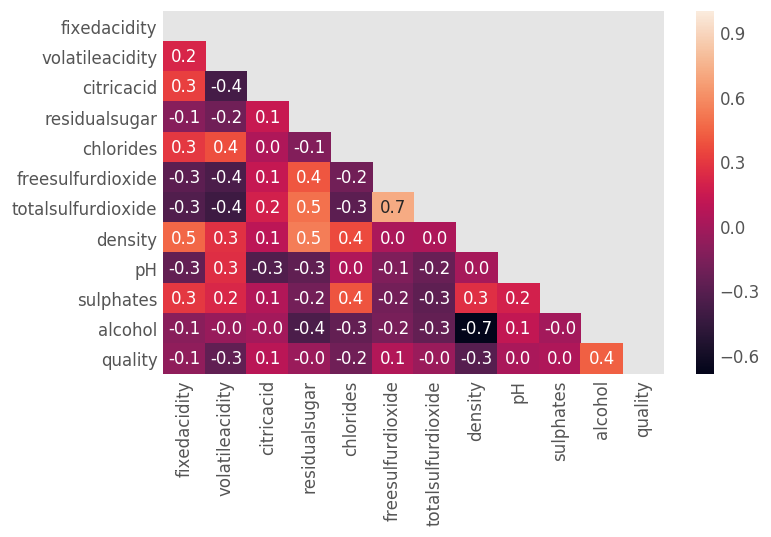

In [840]:
plt.figure(dpi=120)
corr = reg_data.drop(['type_Branco','type_Tinto'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask)
plt.show()

A análise de correlação é importante pois variáveis altamente correlacionadas tornam difícil a interpretação de coeficientes individualmente, ou seja, a importância/impacto de cada uma das variáveis no output do modelo de regressão linear.

<br>

Através da análise de correlação podemos observar :

<br>

- totalsulfurdioxide e freesulfurdioxide possuem um alto grau de correlação, dado o fato de que o a variável freesulfurdioxide é um valor encontrado dentro da variável totalsulfurdioxide. Isso pode levar a um cenário de colinearidade. Basedo nesses dados, vamos manter apenas uma das duas variáveis, totalsulfurdioxide.

<br>

- Em relação a variável target quality :
    - Poucas variáveis possuem um forte correlação com a variável target quality. A variável independente com maior grau de correlação é alcohol, com grau 0.4 de correlação.
    - Dentre todas as variáveis independentes, temos volatileacidity, chlorides, density e alcohol como as com maior impacto na variável target. Todas as demais possuem um grau de correlácão muito fraco com a variável target.

<br>



#### Preparação dos dados

Após análise dos dados de correlação das variáveis independentes, formulamos seis hipóteses de variáveis a serem testadas:
1. alcohol
2. alcohol, density
3. alcohol, density, chlorides
4. alcohol, density, chlorides, volatileacidity
5. todas as variáveis - freesulfurdioxide
6. todas as variáveis

In [909]:
# Limpeza de variáveis e aplicação de one hot encode
reg_data = data.copy()
y_reg = reg_data['quality']
reg_data = reg_data.drop(['Vinho','quality'], axis=1)

X_reg_1 = reg_data[['alcohol']]
X_reg_2 = reg_data[['alcohol','density']]
X_reg_3 = reg_data[['alcohol','density','chlorides']]
X_reg_4 = reg_data[['alcohol','density','chlorides','volatileacidity']]
X_reg_5 = reg_data.drop('freesulfurdioxide', axis=1)
X_reg_6 = reg_data
X_reg_variations = [X_reg_1, X_reg_2, X_reg_3, X_reg_4, X_reg_5, X_reg_6]

inputs_group = []
for variation in X_reg_variations:
    # cada elemento do array input_group possui o formato: (x_train_reg, x_test_reg, y_train_reg, y_test_reg)
    inputs_group.append(train_test_split(variation, y_reg, test_size=0.2, random_state=42))

####  Treinamento dos modelos e validação

In [910]:
# Regressão Linear
reg_lin = LinearRegression()

reg_lin_predictions = []
for inputs in inputs_group:
    # treinamento do modelo de regressão linear
    reg_lin.fit(inputs[0], inputs[2])
    # teste do modelo de regressão l
    reg_lin_predictions.append(reg_lin.predict(inputs[1]))

# Árvore de Regressão
reg_tree = DecisionTreeRegressor()

reg_tree_predictions = []
for inputs in inputs_group:
    # treinamento do modelo de árvore de regressão
    reg_tree.fit(inputs[0], inputs[2])
    # teste do modelo de árvore de regressão
    reg_tree_predictions.append(reg_tree.predict(inputs[1]))


#### Avaliação qualidade modelos

In [911]:
evaluation = pd.DataFrame(columns=['Modelo', 'Hipótese','MAE', 'MSE', 'R2'])
for index, prediction in enumerate(reg_lin_predictions):
    evaluation = evaluation.append({'Modelo': "Regressão Linear", 
                                    'Hipótese': index+1,
                                    'MAE': mean_absolute_error(inputs_group[index][3], prediction),
                                    'MSE': mean_squared_error(inputs_group[index][3], prediction),
                                    'R2': r2_score(inputs_group[index][3], prediction)}, ignore_index=True)

for index, prediction in enumerate(reg_tree_predictions):
    evaluation = evaluation.append({'Modelo': "Árvore Regressão", 
                                    'Hipótese': index+1,
                                    'MAE': mean_absolute_error(inputs_group[index][3], prediction),
                                    'MSE': mean_squared_error(inputs_group[index][3], prediction),
                                    'R2': r2_score(inputs_group[index][3], prediction)}, ignore_index=True)

evaluation.set_index(['Modelo', 'Hipótese'])

MAE       MSE        R2
Modelo           Hipótese                              
Regressão Linear 1         0.616825  0.598010  0.184194
                 2         0.616854  0.597728  0.184577
                 3         0.611899  0.589756  0.195453
                 4         0.582692  0.556055  0.241429
                 5         0.572942  0.539947  0.263403
                 6         0.566281  0.531094  0.275481
Árvore Regressão 1         0.620122  0.595282  0.187915
                 2         0.561304  0.780873 -0.065269
                 3         0.538462  0.821667 -0.120920
                 4         0.533333  0.831453 -0.134270
                 5         0.524615  0.804615 -0.097658
                 6         0.474615  0.650000  0.113268

Tanto a Regressão Linear quanto a Árvore de Regressão obtiveram uma performance extremamente baixa.

<br>

- Menor MAE : Árvore de Regressão + Hipótese 5 (todas as variáveis)
- Menor MSE : Regressão Linear + Hipótese 5 (todas as variáveis)
- Melhor R2 : Hipótese 5 (todas as variáveis)

<br>

Algumas observações :

- Para a árvore de regressãso, a métrica MAE foi muito melhor em comparação com a regressão linear, porém, quando observamos a métrica MSE para a árvore de regressão, observamos que a taxa de erro é muito mais alta. Esse fato acontece pois np caso da MSE, outliers ou erros maiores são muito mais penalizados. Isso pode indicar que a árvore de regressão gera uma quantidade muito maior de outliers se compararmos com a regressão linear.
- Praticamente todas as hipóteses obtiveram um resultado ruim com a árvore de regressão no teste de R2, significando que o uso do cálculo da média se mostra mais preciso do que o próprio modelo de árvore de regressão.

AttributeError: 'int' object has no attribute 'barh'

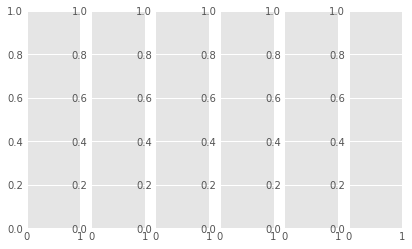

In [915]:
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax.hist(reg_lin_predictions[i], ax=i)
    ax.hist(inputs_group[index][3], alpha=0.5)
    

plt.show()

AttributeError: 'tuple' object has no attribute 'barh'

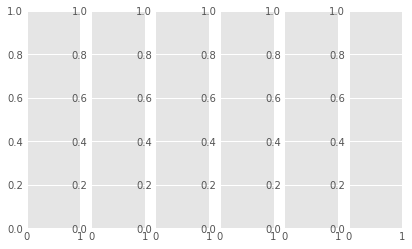

In [930]:
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax1 = sns.barplot(reg_tree_predictions[5], alpha=0.7, ax=(1,i))
#     ax.hist(y_test_reg, alpha=0.5)
plt.show()

In [918]:
type(reg_lin_predictions[0])

numpy.ndarray

## Etapa 2 - Técnicas de classificação (output categórico)

#### Preparação dos dados / Definição da variável resposta

Nesta etapa, a variável target é removida do dataframe principal e movida para uma nova variável.

O processo de one hot encode também é aplicado nas variáveis categóricas.

Além disso, realizamos a divisão do dataset em dois grupos : treino e test/validação.

Diferente da etapa de regressão, aqui realizamos a categorização da variável target como Bom (quality>=6) ou Ruim (quality <6). 

In [803]:
cls_data = data.copy()

# Categorização da variável target
cls_data['quality'] = cls_data['quality'].apply(lambda x: 1 if x>=6 else 0)

# Limpeza de variáveis e aplicação de one hot encode
cls_dummies = pd.get_dummies(cls_data['Vinho'], prefix='type')
cls_data_processed = pd.concat([cls_data, cls_dummies], axis=1)
y = cls_data_processed['quality']
X = cls_data_processed.drop(['Vinho','quality'], axis=1)

# Split entre dataset de treino e teste/validação
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [806]:
x_test

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,type_Branco,type_Tinto
3103,8.4,0.20,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.900000,1,0
1419,6.6,0.34,0.20,1.0,0.053,26.0,112.0,0.99336,3.32,0.55,9.100000,1,0
4761,6.7,0.41,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,12.893333,1,0
4690,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,0,1
4032,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.800000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,6.8,0.31,0.19,3.5,0.086,30.0,130.0,0.99300,2.83,0.44,9.600000,1,0
2850,8.8,0.17,0.38,1.8,0.040,39.0,148.0,0.99420,3.16,0.67,10.200000,1,0
4917,7.6,0.21,0.35,1.2,0.041,7.0,106.0,0.99140,3.06,0.45,11.300000,1,0
5198,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.500000,1,0


#### EDA

####  Treinamento dos modelos e validação

In [807]:
# Regressão Logística

reg_log = LogisticRegression(max_iter=5000)
# Treinamento modelo
reg_log.fit(x_train, y_train)
# Predição
reg_log_preds = reg_log.predict(x_test)

# Árvore de Decisão

cls_tree = DecisionTreeClassifier()
# Treinamento modelo
cls_tree.fit(x_train, y_train)
# Predição
cls_tree_preds = cls_tree.predict(x_test)

#### Avaliação qualidade modelos

In [809]:
precision_score(y_test, cls_tree_preds)

0.8339140534262486

## Etapa 3 - Técnicas de clusterização

#### Preparação dos dados

#### 1.1.1 Descrição geral de variáveis

Comparando os vinhos tinto e branco, podemos estabelecer duas observações :

<br>

- Possuímos muito mais exemplos da classe de vinhos brancos do que vinhos tintos (desbalanceamento dentro da variável 'tipo')
- Desbalanceamento entre os valores da variável target (muitas amostras de qualidade 5, 6 e 7 mas poucas de demais valores)

<br>

Observando o desbalanceamento da variável target assumindo o formato categórico, temos :

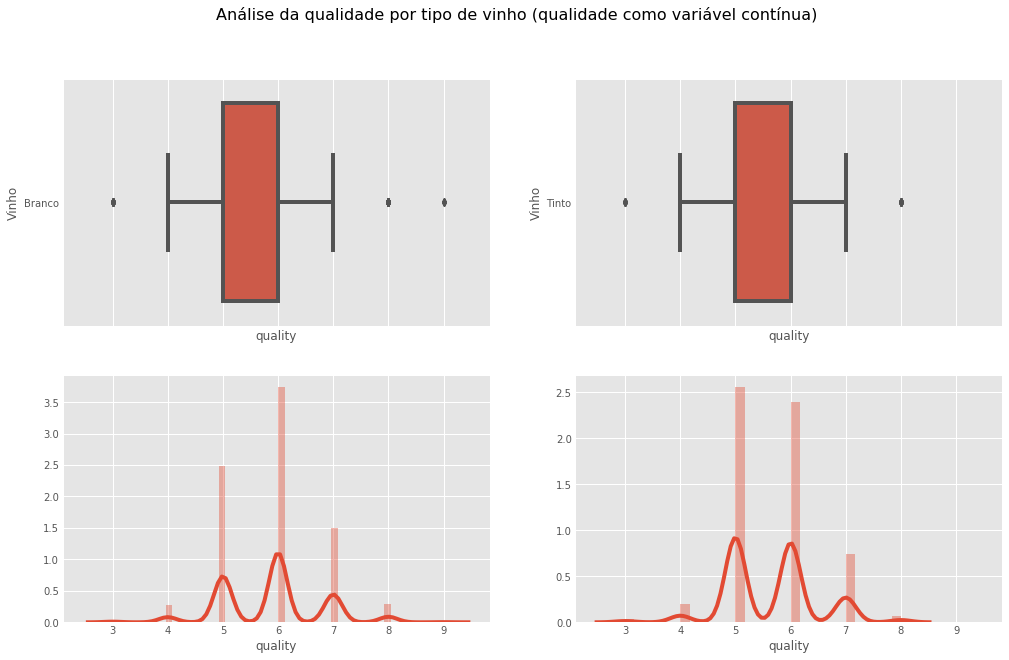

In [340]:
red_wine = data.loc[data['Vinho'] == 'Tinto']
white_wine = data.loc[data['Vinho'] == 'Branco']

f1, axes1 = plt.subplots(2, 2, figsize=(15,10), sharex=True)
f1.suptitle("Análise da qualidade por tipo de vinho (qualidade como variável contínua)", fontsize = 16)

ax1 = sns.boxplot(y=white_wine['Vinho'], x=white_wine['quality'], ax=axes1[0,0])
ax2 = sns.boxplot(y=red_wine['Vinho'], x=red_wine['quality'], ax=axes1[0,1])
ax3 = sns.distplot(white_wine['quality'], ax=axes1[1,0])
ax4 = sns.distplot(red_wine['quality'], ax=axes1[1,1])

In [341]:
print("Fator de skeweness : {}".format(target.skew()))
print("Kurtosis : {}".format(target.kurtosis()))
print("Mediana : {}".format(target.median()))
print(target.describe())

Fator de skeweness : 0.18962269337269674
Kurtosis : 0.2323222693432636
Mediana : 6.0
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


A variável target apresenta os seguintes coeficientes de distirbuição :

<br>

- Fator de skeweness - 0.1896
- Kurtosis - 0.2323

<br>

Uma primeira observação que pode ser feita através do gráfico é a da variável target possuir ums distribuição multimodal, fato o qual é confirmado através da proximidade dos valores da mediana(6.0) e média(5.81).

#### 1.1.3 Análise das variáveis independentes

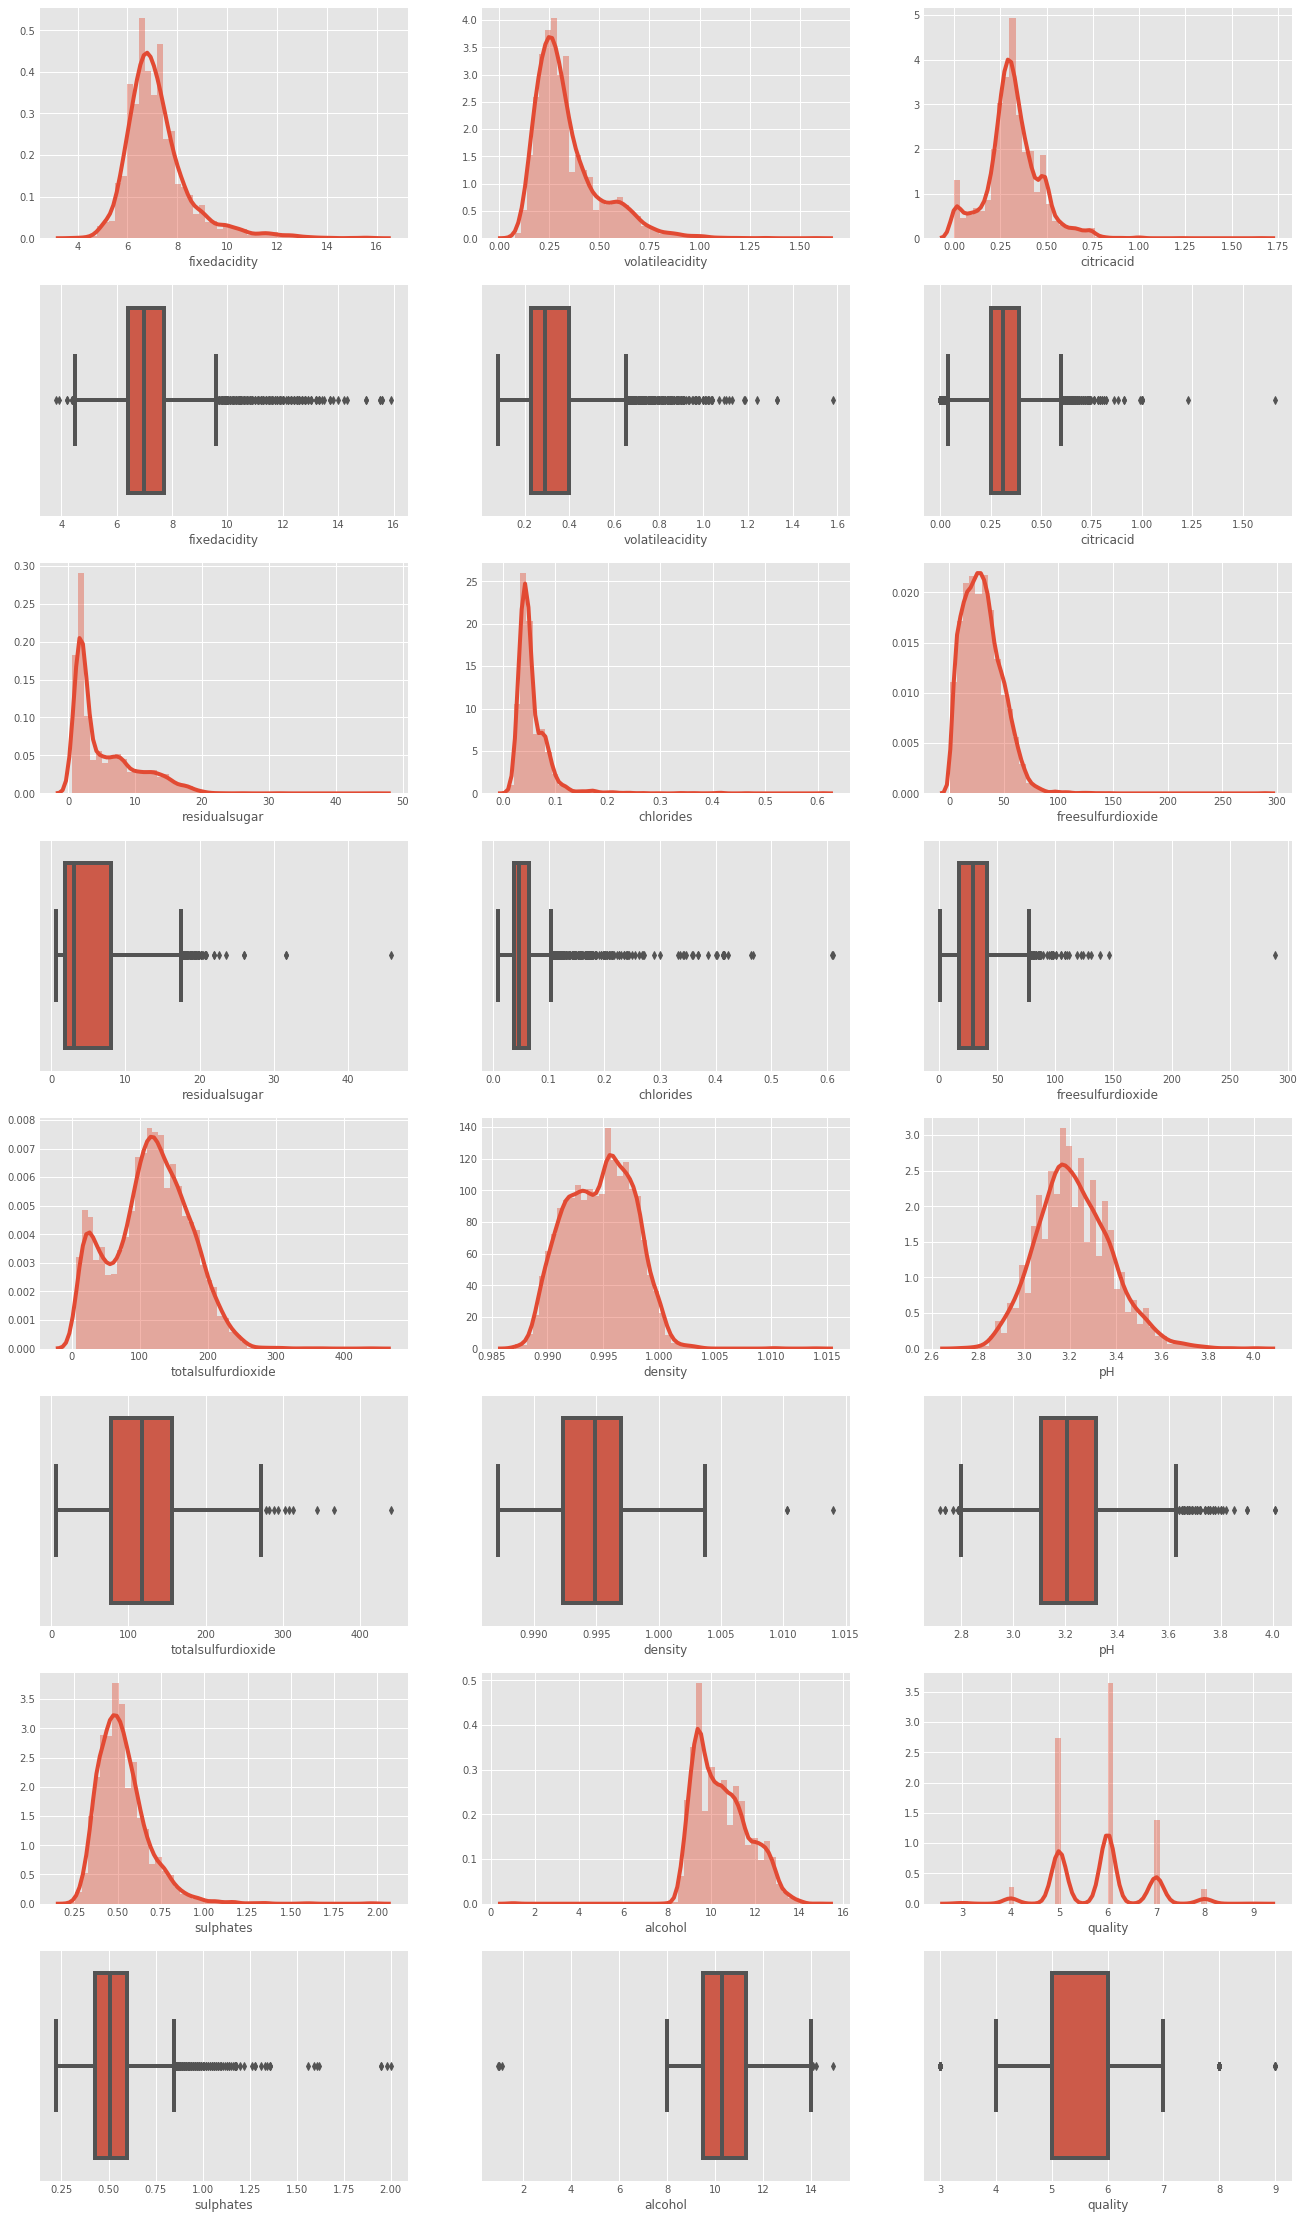

In [412]:
columns = data.columns
column_count = 0
hist_ax = [0,2,4,6]
box_ax = [1,3,5,7]
f1, axes1 = plt.subplots(8, 3, figsize=(20,40))
for i,j in zip(hist_ax, box_ax):
    for k in range(3):
        sns.distplot(data[columns[column_count]], ax=axes1[i, k])
        sns.boxplot(data[columns[column_count]], ax=axes1[j, k])
        column_count += 1    